In [1]:
# Name: Zita Lo
# Student Number: 20196119
# Program: MMA
# Cohort: Winter 2021
# Course Number: MMA 869
# Date: August 13, 2020


# Answer to Question 1
# See Assignment1_869_Q1_ZitaLo.py for Final Result
# This is supplementary code - Kmeans


In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read in data
df = pd.read_csv("jewelry_customers.csv")


# EDA

In [4]:
# Understand the data
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [6]:
df.shape
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [7]:
# Check if there are null values
df.isnull().any()

Age              False
Income           False
SpendingScore    False
Savings          False
dtype: bool

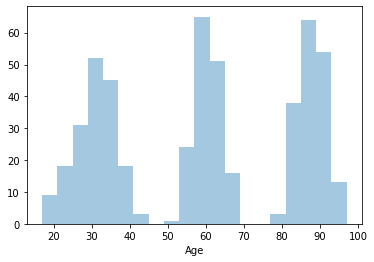

In [8]:
# Plot graph to understand data - Age distribution
sns.distplot(df['Age'],kde=False,bins=20)

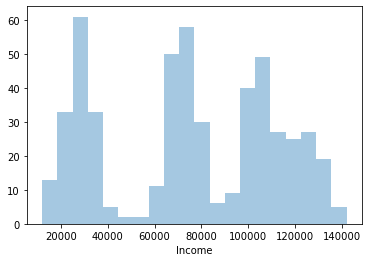

In [9]:
# Plot graph to understand data - Income distribution
sns.distplot(df['Income'],kde=False,bins=20)

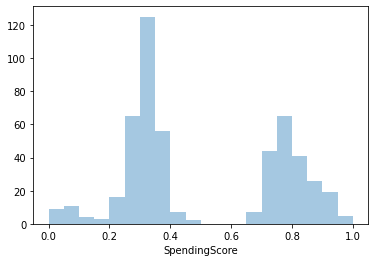

In [10]:
# Plot graph to understand data - Spending Score distribution
sns.distplot(df['SpendingScore'],kde=False,bins=20)

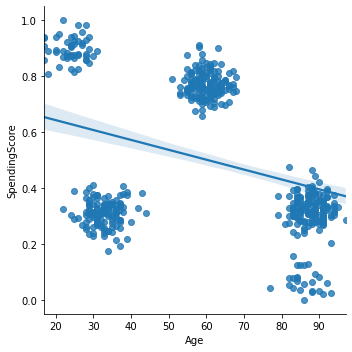

In [11]:
# Plot graph to understand data - Spending Score vs Age
sns.lmplot(data = df, y='SpendingScore',x='Age')

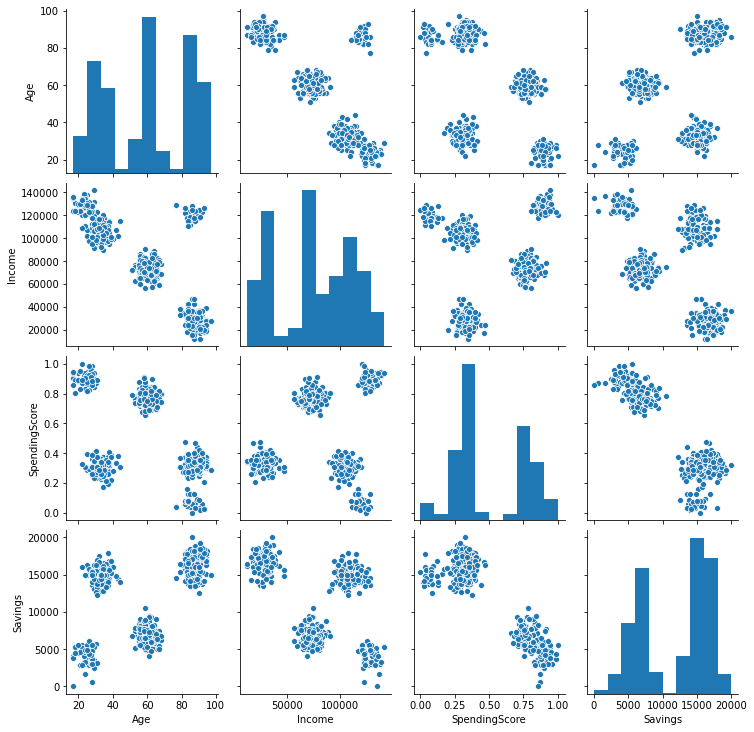

In [12]:
# Plot some graphs to understand all data in pairs
sns.pairplot(df)

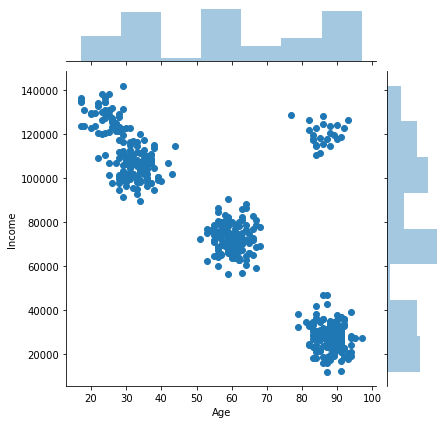

In [13]:
# Plot Age vs Income
sns.jointplot(data=df,x='Age',y='Income')

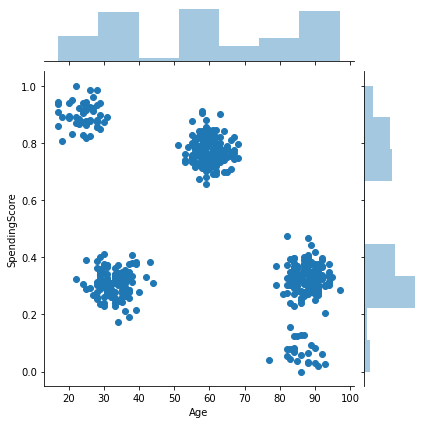

In [14]:
# Plot Age vs Spending Score
sns.jointplot(data=df,x='Age',y='SpendingScore')

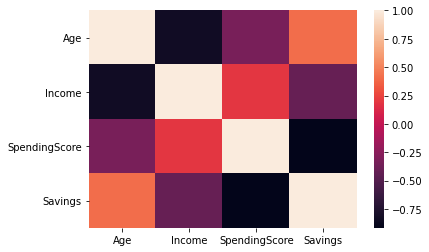

In [15]:
# Plot heat map to look at correlations between features
sns.heatmap(df.corr())

# Scale and normalize data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [18]:
scaled_features = scaler.transform(df)

In [19]:
# Convert it from series to a data frame and include headings for viewing purpose
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


# K Means Cluster

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=5,init='k-means++', n_init=10,random_state=101)

In [22]:
# Fit K means model
kmeans.fit(df_feat)

KMeans(n_clusters=5, random_state=101)

In [23]:
# Display K means centers
kmeans.cluster_centers_


array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [24]:
# Display K means labels
kmeans.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

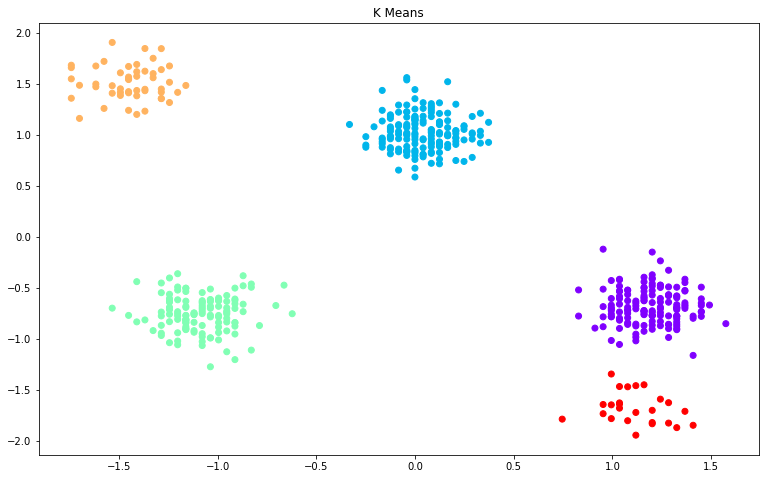

In [25]:
# Plot k menas cluster results by age and spending score
f = plt.figure(figsize=(10,6))
ax1 = f.add_axes([0,0,1,1])
ax1.set_title('K Means')
ax1.scatter(df_feat['Age'],df_feat['SpendingScore'],c=kmeans.labels_,cmap='rainbow')


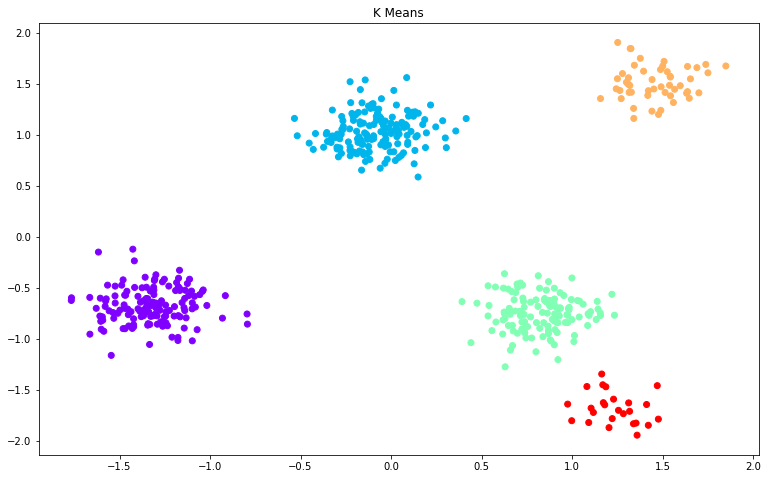

In [26]:
# Plot k menas cluster results by income and spending score
f = plt.figure(figsize=(10,6))
ax1 = f.add_axes([0,0,1,1])
ax1.set_title('K Means')
ax1.scatter(df_feat['Income'],df_feat['SpendingScore'],c=kmeans.labels_,cmap='rainbow')

In [27]:
# Inverse transform cluster centers
scaler.inverse_transform(kmeans.cluster_centers_)

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

In [28]:
# Look at some example rows in each cluster
for label in set(kmeans.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(df_feat[kmeans.labels_==label].head()))


Cluster 0:
[[8.70000000e+01 1.77600000e+04 3.48777548e-01 1.68695071e+04]
 [8.70000000e+01 4.25920000e+04 3.55289682e-01 1.80862872e+04]
 [8.30000000e+01 3.43840000e+04 3.24718682e-01 1.47833791e+04]
 [8.40000000e+01 2.76930000e+04 3.67062973e-01 1.78795589e+04]
 [8.70000000e+01 3.14810000e+04 3.17423971e-01 1.61806881e+04]]

Cluster 1:
[[5.80000000e+01 7.77690000e+04 7.91328777e-01 6.55982992e+03]
 [5.90000000e+01 8.17990000e+04 7.91082047e-01 5.41766143e+03]
 [6.20000000e+01 7.47510000e+04 7.02656952e-01 9.25899297e+03]
 [5.90000000e+01 7.43730000e+04 7.65679562e-01 7.34633450e+03]
 [5.40000000e+01 7.65000000e+04 7.85197850e-01 6.87888425e+03]]

Cluster 2:
[[3.60000000e+01 9.97800000e+04 2.65432607e-01 1.63984013e+04]
 [3.00000000e+01 9.99490000e+04 3.44679224e-01 1.36216397e+04]
 [3.10000000e+01 1.07963000e+05 2.90508633e-01 1.34070814e+04]
 [3.00000000e+01 1.01073000e+05 3.14387120e-01 1.43245560e+04]
 [3.30000000e+01 1.01058000e+05 3.15081550e-01 1.49118684e+04]]

Cluster 3:
[[2.

C:\ProgramData\Anaconda3\envs\pycaretenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


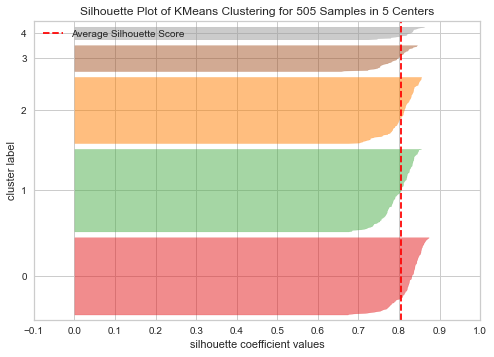

In [29]:
# Visualize Silhouette for the 5 clusters
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_feat)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('kmeans-5-silhouette.png', transparent=False)

# Hyperparameter Tuning

In [30]:
from sklearn.metrics import silhouette_score, silhouette_samples

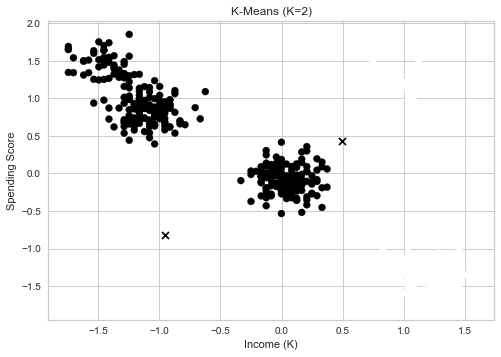

K=2, WCSS=1022.39, Sil=0.52


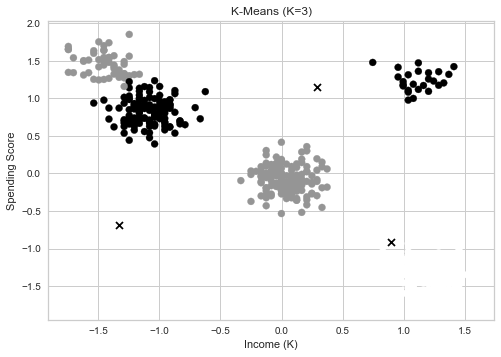

K=3, WCSS=384.81, Sil=0.70


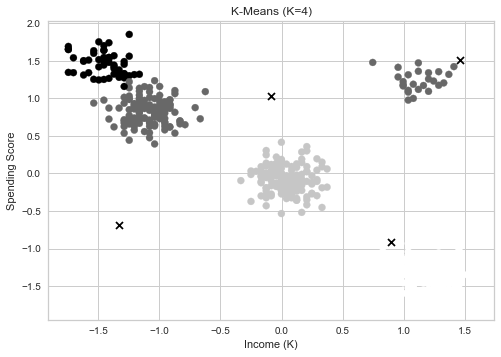

K=4, WCSS=189.70, Sil=0.76


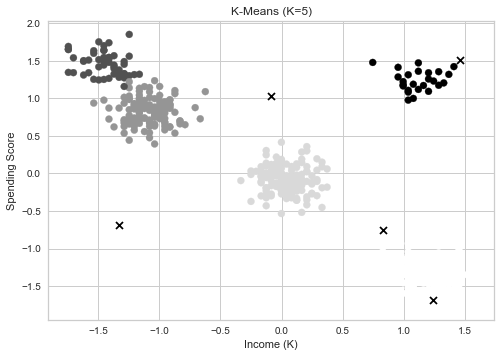

K=5, WCSS=66.51, Sil=0.80


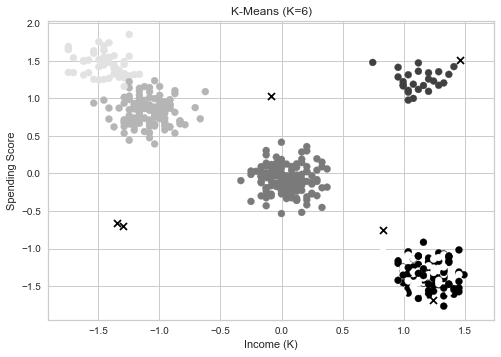

K=6, WCSS=61.14, Sil=0.63


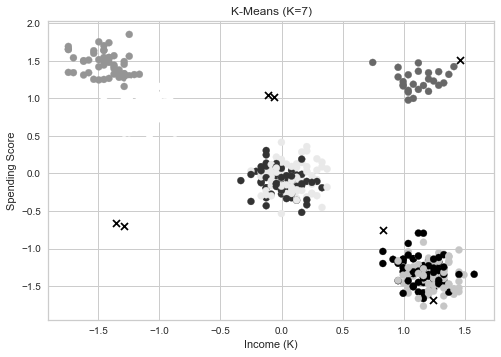

K=7, WCSS=56.84, Sil=0.44


In [31]:
# load the function
def do_kmeans(X, k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=101)
    kmeans.fit(X)

    plt.figure();
    plt.scatter(df_feat.iloc[:, 0], df_feat.iloc[:, 1], c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = kmeans.inertia_
    sil = silhouette_score(df_feat, kmeans.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

# Loop through K from 2 to 8 and generate plots
for k in range(2, 8):
    do_kmeans(df_feat, k)

# Elbow Method

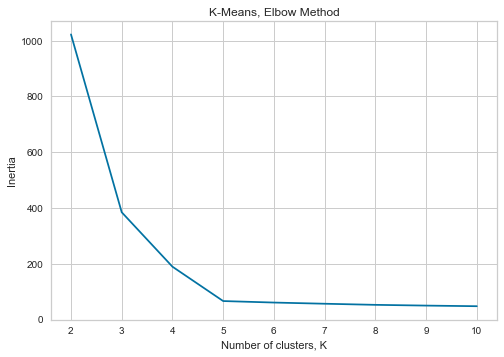

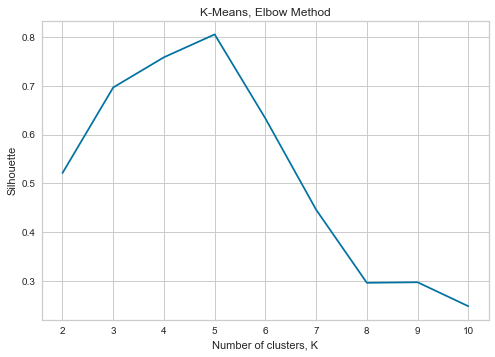

In [32]:
# Display plots using Elbow Method and find the optimal cluster number
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_feat)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(df_feat, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");